In [8]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from pathlib import Path
import hvplot.pandas
import requests
import numpy
from scipy.stats import linregress 
import seaborn as sns

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Input cvs raw data to data frames
delays_df = pd.read_csv("Airline_Delay_Cause_cleaned.csv")
delays_df.head()

,ID,year,month,carrier,carrier_name,airport,airport_name,arr_flights,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted
0,1,2024,5,UA,United Airline,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",637.0,52.27,9.44,62.80,0.0,68.49,9.0,1.0
1,2,2024,5,UA,United Airline,AUS,"Austin, TX: Austin - Bergstrom International",780.0,62.17,10.39,67.55,0.0,76.88,13.0,4.0
2,3,2024,5,UA,United Airline,BNA,"Nashville, TN: Nashville International",603.0,45.67,6.26,45.91,0.0,58.15,3.0,3.0
3,4,2024,5,UA,United Airline,BOS,"Boston, MA: Logan International",1092.0,75.30,22.35,124.17,0.0,87.19,14.0,4.0
4,5,2024,5,UA,United Airline,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",326.0,29.85,2.95,15.36,0.0,30.83,3.0,0.0


In [10]:
# Display data type for columns
delays_df.dtypes

ID                    int64
year                  int64
month                 int64
carrier              object
carrier_name         object
airport              object
airport_name         object
arr_flights         float64
carrier_ct          float64
weather_ct          float64
nas_ct              float64
security_ct         float64
late_aircraft_ct    float64
arr_cancelled       float64
arr_diverted        float64
dtype: object

In [11]:
# Convert NaN values with 0 and then convert all float columns to integers
delays_df = delays_df.fillna(0).apply(lambda x: x.astype(int) if x.dtype == 'float64' else x)

In [12]:
# Calculate the sum for 'arr_flights' grouped by 'year' and 'carrier_name'
carrier_sum_year = delays_df.groupby(['year', 'carrier_name'])['arr_flights'].sum().reset_index()
carrier_sum_year = carrier_sum_year.rename(columns={'arr_flights': 'Total Flights'})

# Calculate the sum for 'carrier_ct' grouped by 'year' and 'carrier_name'
carrier_ct_year = delays_df.groupby(['year', 'carrier_name'])['carrier_ct'].sum().reset_index()

# Calculate the sum for 'weather_ct' grouped by 'year' and 'carrier_name'
weather_ct_year = delays_df.groupby(['year', 'carrier_name'])['weather_ct'].sum().reset_index()

# Calculate the sum for 'nas_ct' grouped by 'year' and 'carrier_name'
nas_ct_year = delays_df.groupby(['year', 'carrier_name'])['nas_ct'].sum().reset_index()

# Calculate the sum for 'security_ct' grouped by 'year' and 'carrier_name'
security_ct_year = delays_df.groupby(['year', 'carrier_name'])['security_ct'].sum().reset_index()

# Calculate the sum for 'late_aircraft_ct' grouped by 'year' and 'carrier_name'
late_aircraft_ct_year = delays_df.groupby(['year', 'carrier_name'])['late_aircraft_ct'].sum().reset_index()

# Calculate the sum for 'arr_cancelled' grouped by 'year' and 'carrier_name'
arr_cancelled_year = delays_df.groupby(['year', 'carrier_name'])['arr_cancelled'].sum().reset_index()

# Calculate the sum for 'arr_diverted' grouped by 'year' and 'carrier_name'
arr_diverted_year = delays_df.groupby(['year', 'carrier_name'])['arr_diverted'].sum().reset_index()

# Append 'carrier_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_carrier_ct'] = carrier_ct_year['carrier_ct']

# Append 'weather_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_weather_ct'] = weather_ct_year['weather_ct']

# Append 'nas_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_nas_ct'] = nas_ct_year['nas_ct']

# Append 'security_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_security_ct'] = security_ct_year['security_ct']

# Append 'late_aircraft_ct' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_late_aircraft_ct'] = late_aircraft_ct_year['late_aircraft_ct']

# Append 'arr_cancelled' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_arr_cancelled'] = arr_cancelled_year['arr_cancelled']

# Append 'arr_diverted' sum as a new column using .loc
carrier_sum_year.loc[:, 'sum_arr_diverted'] = arr_diverted_year['arr_diverted']

# Calculate the sum of all delays and append it as a new column
carrier_sum_year['Total Delays'] = (
    carrier_sum_year['sum_carrier_ct'] +
    carrier_sum_year['sum_weather_ct'] +
    carrier_sum_year['sum_nas_ct'] +
    carrier_sum_year['sum_security_ct'] +
    carrier_sum_year['sum_late_aircraft_ct'] +
    carrier_sum_year['sum_arr_cancelled'] +
    carrier_sum_year['sum_arr_diverted']
)

# Renaming the columns
carrier_sum_year.rename(columns={
    'sum_carrier_ct': 'Carrier Delay',
    'sum_weather_ct': 'Weather Delay',
    'sum_nas_ct': 'NAS Delay',
    'sum_security_ct': 'Security Delay',
    'sum_late_aircraft_ct': 'Late Aircraft Delay',
    'sum_arr_cancelled': 'Cancelled Flights',
    'sum_arr_diverted': 'Diverted Flights',
    'on_time_arrivals': 'On-Time Flights',
    'carrier_name': 'Airline'

}, inplace=True)

# Calculate on-time arrivals by subtracting total delays from sum_arr_flights
carrier_sum_year['On-Time Flights'] = carrier_sum_year['Total Flights'] - carrier_sum_year['Total Delays']

#Calculate % of on-time arrivals
carrier_sum_year['% On-Time Flights'] = carrier_sum_year['On-Time Flights'] / carrier_sum_year['Total Flights'] * 100

# Display the resulting DataFrame
carrier_sum_year

,year,Airline,Total Flights,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay,Cancelled Flights,Diverted Flights,Total Delays,On-Time Flights,% On-Time Flights
0,2019,American Airline,522676,30738,3534,34144,157,37729,11321,1553,119176,403500,77.198877
1,2019,Delta Airline,524423,22410,2509,31884,53,22483,994,1365,81698,442725,84.421355
2,2019,Southwest Airline,496347,27361,1645,20248,273,35910,8580,1198,95215,401132,80.816848
3,2019,United Airline,352955,14963,2733,32577,13,25282,2805,1289,79662,273293,77.429984
4,2020,American Airline,467442,16556,1578,17006,197,11290,27697,784,75108,392334,83.932124
5,2020,Delta Airline,456450,13171,1057,16532,89,7844,21874,632,61199,395251,86.592398
6,2020,Southwest Airline,528219,10917,648,9190,80,9285,43144,572,73836,454383,86.021707
7,2020,United Airline,258770,6335,718,9243,1,5975,18499,360,41131,217639,84.105190
8,2021,American Airline,590611,34876,3989,25157,547,30411,12772,1739,109491,481120,81.461402
9,2021,Delta Airline,585041,26880,2218,20788,246,15308,2952,1033,69425,515616,88.133310


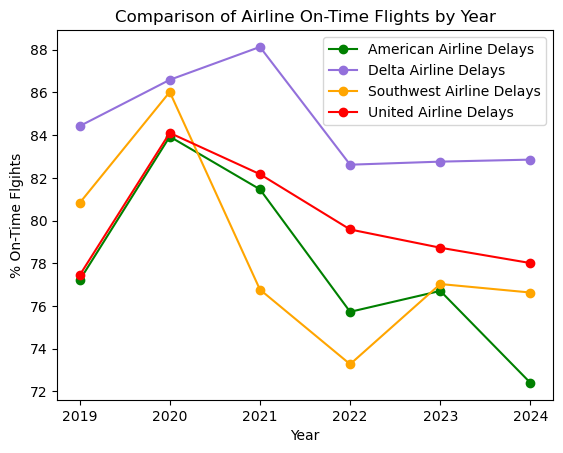

In [18]:
# Define colors for each airline
airline_colors = {
    'American Airline': 'green',
    'Delta Airline': 'mediumpurple',
    'Southwest Airline': 'orange',
    'United Airline': 'red'
}

# Plotting the line chart for each airline's ontime flights with the specified colors
for idx, airline in enumerate(carrier_sum_year['Airline'].unique()):
    airline_cleaned = airline.strip()  # Remove extra spaces
    subset = carrier_sum_year[carrier_sum_year['Airline'] == airline]
    plt.plot(subset['year'], subset['% On-Time Flights'], marker='o', label=f'{airline} Delays', color=airline_colors.get(airline_cleaned, 'gray'))

# Adding labels, title, and legend
plt.xlabel('Year')
plt.ylabel('% On-Time Flgihts')
plt.title('Comparison of Airline On-Time Flights by Year')

# Adding commas to y-axis labels
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y):,}' for y in y_ticks])

# Position legend box 
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.legend(loc='upper right')


# Show the plot
plt.show()

In [17]:
# According to the International Air Transport Association (IATA), on-time performance (OTP) is a critical indicator of an airline's reliability and is typically defined as the percentage of flights that arrive and depart within 15 minutes of their scheduled time. 
# The data collected and analyzed for on-time flights showed an increased during 2020 and into 2021
# This is the result of a reduction in flights during COVID. A reduction in flights will minimize airport traffic making it speedier to get through security as well as the boarding process at the gate. It will also reduce the amount of air traffic which allows for on-time flights.